In [4]:
#packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import seaborn as sns

plt.style.use('ggplot')

import nltk

In [11]:
#read data
!cd

C:\Users\nikhilk3


In [12]:
df=pd.read_csv('Reviews.csv')

In [14]:
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [25]:
df['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [26]:
print(df.shape)

(568454, 10)


In [27]:
df_subset=df.head(10000)

In [28]:
print(df_subset.shape)

(10000, 10)


Explanatory Data Analysis

In [31]:
df['Score'].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

<Axes: title={'center': '#Reviews by Stars'}>

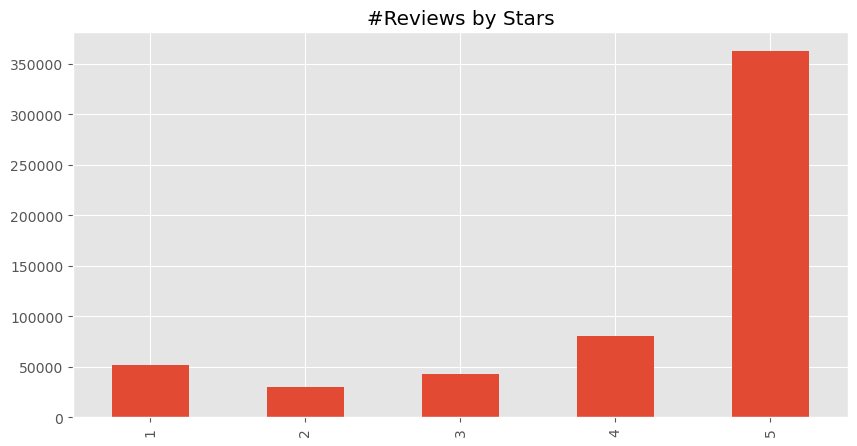

In [35]:
df['Score'].value_counts().sort_index().plot(kind='bar',title='#Reviews by Stars',
                                            figsize=(10,5))

In [36]:
#Basic NLTK

In [37]:
example=df['Text'][50]

In [38]:
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [40]:
nltk.word_tokenize(example)

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [44]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [43]:
print(tokens[:20])

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft', ',', 'I', 'do', "n't", 'like', 'it', '.', 'Quaker', 'Oats', 'is']


In [45]:
print(nltk.pos_tag(tokens))

[('This', 'DT'), ('oatmeal', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('good', 'JJ'), ('.', '.'), ('Its', 'PRP$'), ('mushy', 'NN'), (',', ','), ('soft', 'JJ'), (',', ','), ('I', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('like', 'VB'), ('it', 'PRP'), ('.', '.'), ('Quaker', 'NNP'), ('Oats', 'NNPS'), ('is', 'VBZ'), ('the', 'DT'), ('way', 'NN'), ('to', 'TO'), ('go', 'VB'), ('.', '.')]


In [46]:
tagged=nltk.pos_tag(tokens)

In [51]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\nikhilk3\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\nikhilk3\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [52]:
entities=nltk.chunk.ne_chunk(tagged)

In [53]:
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


Valence Aware Dictionary and sEntiment Reasoner--> VADER

In [55]:
from nltk.sentiment import SentimentIntensityAnalyzer

from tqdm.notebook import tqdm

In [57]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nikhilk3\AppData\Roaming\nltk_data...


True

In [58]:
sia=SentimentIntensityAnalyzer()

In [60]:
sia.polarity_scores('You will get results once you use it regularly')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [61]:
sia.polarity_scores("The only moringa powder that doesn't burn my throat")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [64]:
sia.polarity_scores('I am happy')

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [66]:
sia.polarity_scores('I am happily sad')

{'neg': 0.403, 'neu': 0.13, 'pos': 0.468, 'compound': 0.128}

In [68]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

run polarity score on each comment in the df_subset

In [71]:
res={}
for i, row in tqdm(df_subset.iterrows(),total=len(df_subset)):
    text=row['Text']
    myid=row['Id']
    res[myid]=sia.polarity_scores(text)
    

  0%|          | 0/10000 [00:00<?, ?it/s]

In [73]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [74]:
pd.DataFrame(res)

,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
neg,0.0000,0.1380,0.0910,0.0,0.0000,0.029,0.0340,0.0000,0.0000,0.0000,...,0.0210,0.0620,0.0830,0.0000,0.1500,0.0890,0.0910,0.0630,0.1490,0.026
neu,0.6950,0.8620,0.7540,1.0,0.5520,0.809,0.6930,0.5200,0.8510,0.7050,...,0.8140,0.8160,0.8230,0.7850,0.6470,0.8520,0.7470,0.8110,0.6970,0.811
pos,0.3050,0.0000,0.1550,0.0,0.4480,0.163,0.2730,0.4800,0.1490,0.2950,...,0.1650,0.1220,0.0940,0.2150,0.2030,0.0590,0.1620,0.1260,0.1540,0.164
compound,0.9441,-0.5664,0.8265,0.0,0.9468,0.883,0.9346,0.9487,0.6369,0.8313,...,0.9841,0.9632,0.6049,0.8614,0.3915,-0.5267,0.6808,0.9305,0.2809,0.985


In [76]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
9996,0.089,0.852,0.059,-0.5267
9997,0.091,0.747,0.162,0.6808
9998,0.063,0.811,0.126,0.9305
9999,0.149,0.697,0.154,0.2809


In [77]:
vaders=pd.DataFrame(res).T

vaders=vaders.reset_index().rename(columns={'index':'Id'})

In [78]:
vaders.head()

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468


In [79]:
vaders.merge(df_subset,how='left')

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,0.089,0.852,0.059,-0.5267,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...
9996,9997,0.091,0.747,0.162,0.6808,B000P41A28,A5VVRGL8JA7R,Adam,2,3,5,1306368000,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ..."
9997,9998,0.063,0.811,0.126,0.9305,B000P41A28,A2TGDTJ8YCU6PD,geena77,0,0,5,1347494400,Love this formula!,I wanted to solely breastfeed but was unable t...
9998,9999,0.149,0.697,0.154,0.2809,B000P41A28,AUV4GIZZE693O,"Susan Coe ""sueysis""",1,2,5,1203638400,very convenient,i love the fact that i can get this delieved t...


In [80]:
vaders=vaders.merge(df_subset,how='left')

In [95]:
#now we have sentiment score with text

vaders[['Id','neg','neu','pos','compound','Score','Text']]

,Id,neg,neu,pos,compound,Score,Text
0,1,0.000,0.695,0.305,0.9441,5,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,1,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,4,This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,2,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,5,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...
9995,9996,0.089,0.852,0.059,-0.5267,1,we switched from the advance similac to the or...
9996,9997,0.091,0.747,0.162,0.6808,5,"Like the bad reviews say, the organic formula ..."
9997,9998,0.063,0.811,0.126,0.9305,5,I wanted to solely breastfeed but was unable t...
9998,9999,0.149,0.697,0.154,0.2809,5,i love the fact that i can get this delieved t...


<Axes: xlabel='Score', ylabel='compound'>

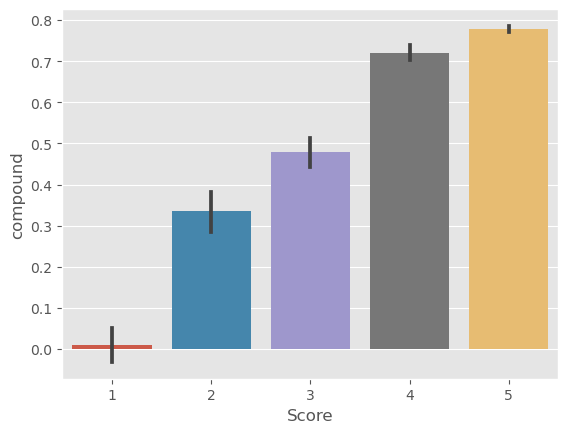

In [96]:
sns.barplot(data=vaders, x='Score',y='compound')

Text(0.5, 1.0, 'Negative')

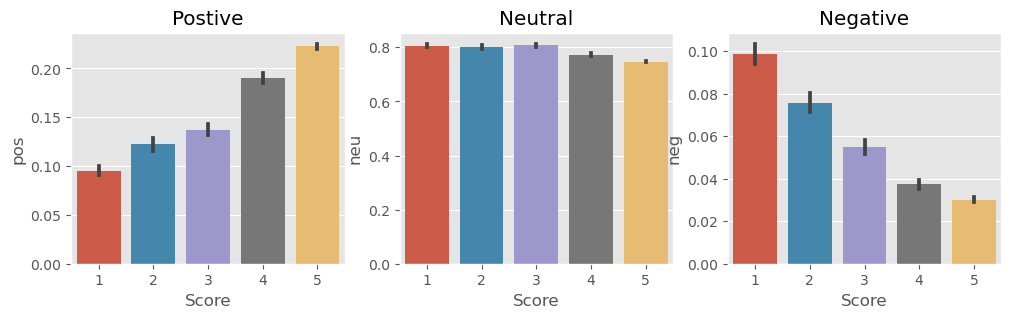

In [102]:
fig, axs = plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[2])

axs[0].set_title('Postive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

### ROBERTA pre trained model

In [103]:
!pip install -U transformers

  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/98/46/f6a79f944d5c7763a9bc13b2aa6ac72daf43a6551f5fb03bccf0a9c2fec1/transformers-4.33.3-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/119.9 kB ? eta -:--:--
     -------------------------- ------------ 81.9/119.9 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 119.9/119.9 kB 1.4 MB/s eta 0:00:00
  Obtaining dependency information for huggingface-hub<1.0,>=0.15.1 from https://files.pythonhosted.org/packages/aa/f3/3fc97336a0e90516901befd4f500f08d691034d387406fdbde85bea827cc/huggingface_hub-0.17.3-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
     - -------------------------------------- 0.1/3.5 MB 7.0 MB/s eta 0:00:01
     -- ------------------------------------- 0.2/3.5 MB 1.7 MB/s eta 0:00:02
     ---- ----------------------------------- 0.4/3.5 MB 2.9 MB/s eta 0:00:02
     ---- -------------


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [104]:
from transformers import AutoTokenizer

In [105]:
from transformers import AutoModelForSequenceClassification

In [106]:
from scipy.special import softmax